# Complex Mappings

A visualisation of a few examples of complex mappings via a simple `python` API.

In [148]:
%matplotlib notebook
%run api.py

# constants
PI = np.pi
TAU = 2 * PI
HALF_PI = PI / 2

The API provides the functions:
- `init_grid`: creates complex gridlines points
- `init_polar`: creates complex polar coordinate points
- `plot_map`: plots color-coded curves in the complex plane

<IPython.core.display.Javascript object>


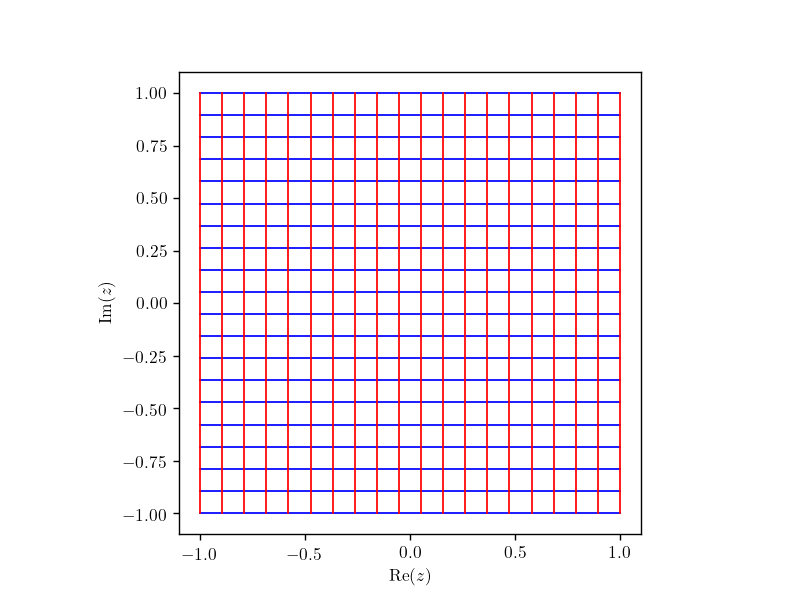

In [121]:
grid = init_grid()
plot_map(grid, map=None)

<IPython.core.display.Javascript object>


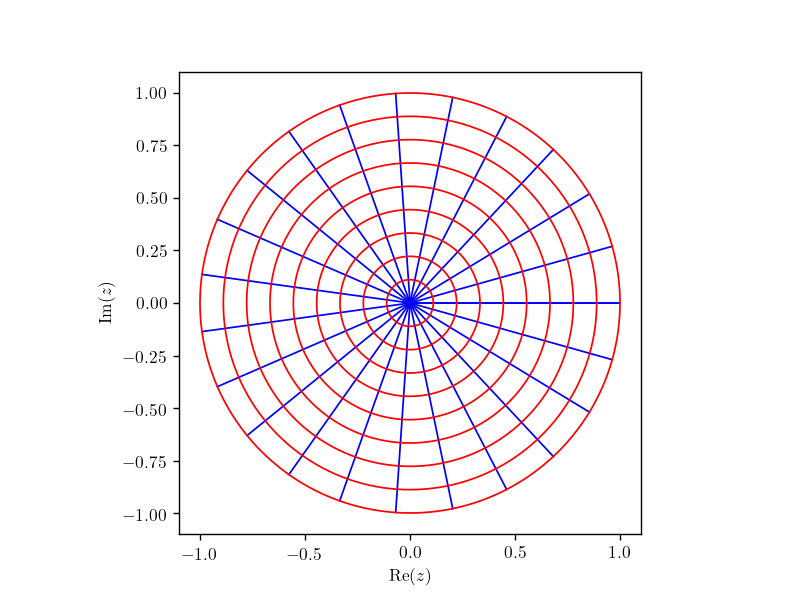

In [122]:
polar = init_polar()
plot_map(polar, map=None)

## Functions

In this section we will explore a few examples of complex functions.
Throughout this notebook we will use the following notation:

- $z = x + i y$ where $x$ and $y$ are real variables
- $w = f(z) = u(x,y) + i v(x,y)$ where $u$ and $v$ are real-valued functions

For polar coordinates:
- $z = r\cdot e^{i\theta}$ where $r$ and $\theta$ are real variables
- $w = f(z) = \rho(r,\theta)\cdot e^{i \varphi(r,\theta)}$ where $\rho$ and $\varphi$ are real-valued functions

### Rotation
The rotation by an angle $\alpha$ is defined by the transformation
$$ f(z) = z\cdot e^{i\alpha} $$

Which can be easily deduced from the polar form
$ f(z) = r\cdot e^{i(\theta+\alpha)} \rightarrow\begin{cases}\rho=r\\ \varphi=\theta+\alpha\end{cases}$

Let's see how the cartesian grid is transformed for $\alpha=\frac{\pi}{6}$

<IPython.core.display.Javascript object>


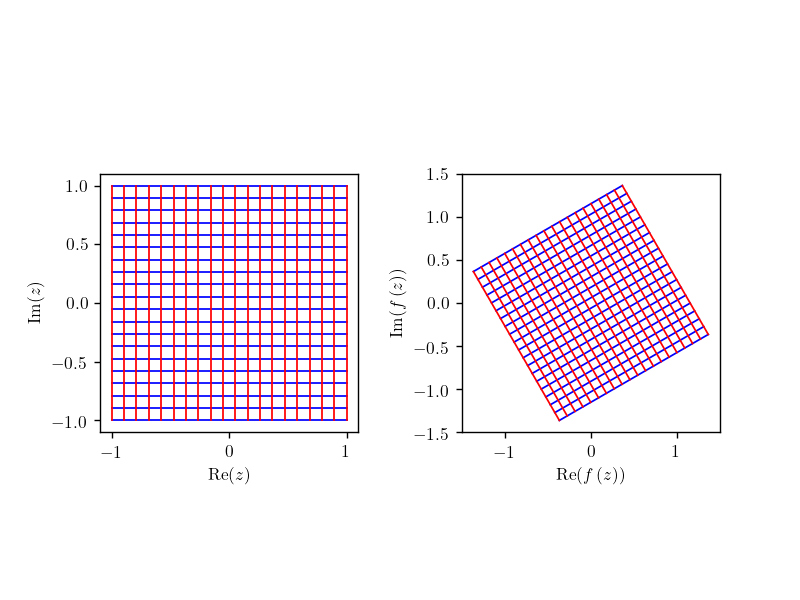

(<matplotlib.axes._subplots.AxesSubplot at 0x7f4b9d090fd0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f4b9d043310>)

In [123]:
rotation = lambda z : z * np.exp(1j * PI / 6)
plot_map(grid, rotation)

<IPython.core.display.Javascript object>


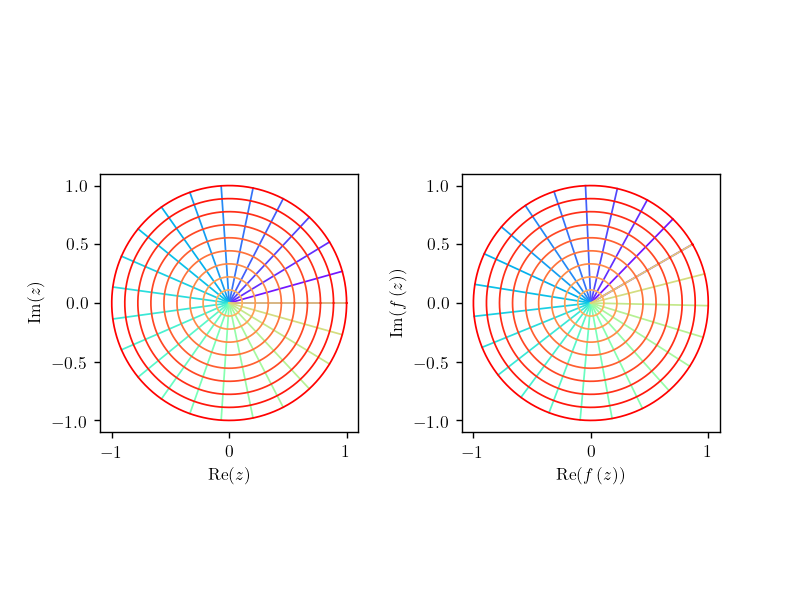

(<matplotlib.axes._subplots.AxesSubplot at 0x7f4b9cec4750>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f4b9dfeb910>)

In [124]:
plot_map(polar, rotation, color_each=True)

### The Square Function

The function $ f(z) = z^2 $ transforms the cartesian grid into a family of parabolas.

$$ f(z) = (x+iy)^2 = \underbrace{(x^2-y^2)}_{u(x,y)} + i\underbrace{(2xy)}_{v(x,y)} $$

<IPython.core.display.Javascript object>


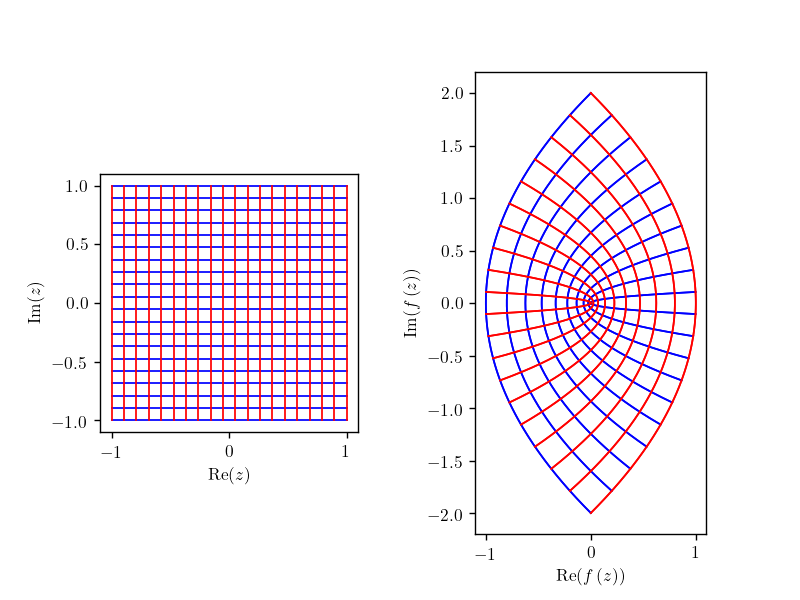

(<matplotlib.axes._subplots.AxesSubplot at 0x7f4b9cd3f610>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f4b9cd65690>)

In [125]:
square = lambda z : z ** 2
plot_map(grid, square)

as for the polar grid,
$ f(z) = (r\cdot e^{i\theta})^2 = \underbrace{r^2}_{\rho} \cdot ^{i\underbrace{(2\theta)}_{\varphi}} $
which doubles the argument of $z$ and distorts its modules $\rho=r^2$.

<IPython.core.display.Javascript object>


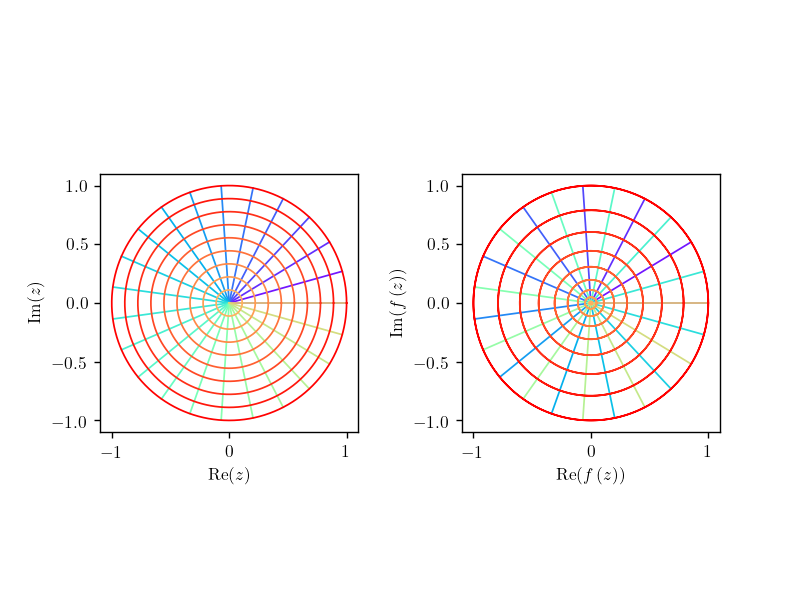

(<matplotlib.axes._subplots.AxesSubplot at 0x7f4b9cb704d0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f4b9cb9e390>)

In [126]:
plot_map(polar, square, color_each=True)

### The Square Root Function

$$ f:z\mapsto \sqrt{z} $$

<IPython.core.display.Javascript object>


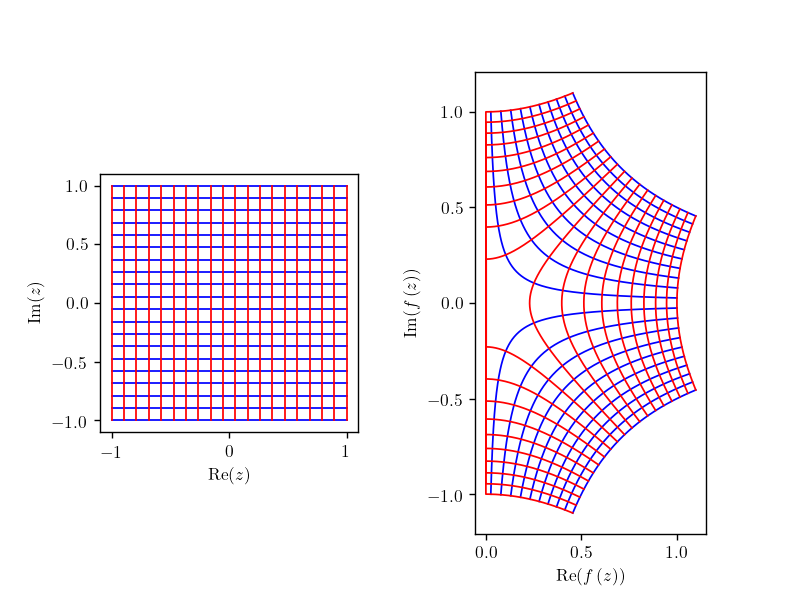

(<matplotlib.axes._subplots.AxesSubplot at 0x7f4b9ca63790>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f4b9ca1c6d0>)

In [127]:
plot_map(grid, np.sqrt)

### $f(z)=z^{\frac{3}{2}}$

<IPython.core.display.Javascript object>


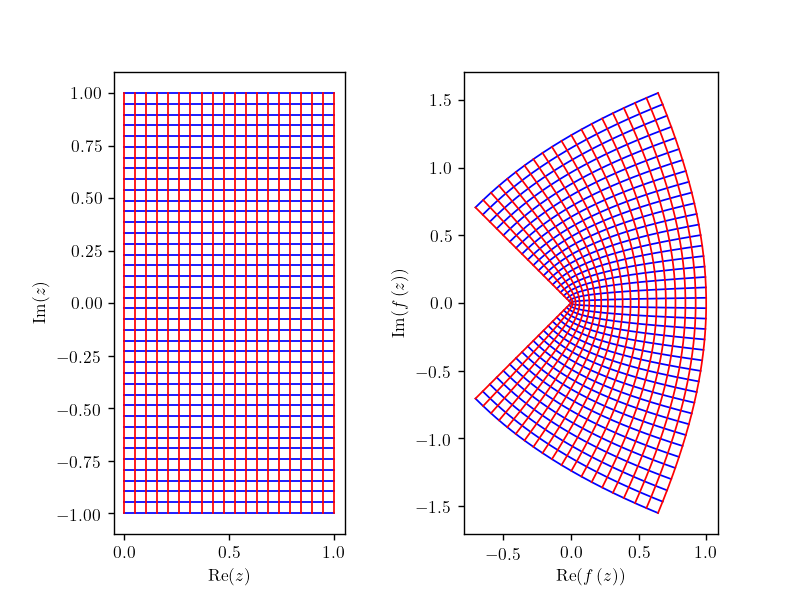

(<matplotlib.axes._subplots.AxesSubplot at 0x7f4b9c89b490>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f4b9c84a5d0>)

In [128]:
half_grid = init_grid(xlim=(0, 1), step=0.05)
plot_map(half_grid, lambda z : z ** (3/2))

### $ f(z) = \frac{1}{z} $

<IPython.core.display.Javascript object>


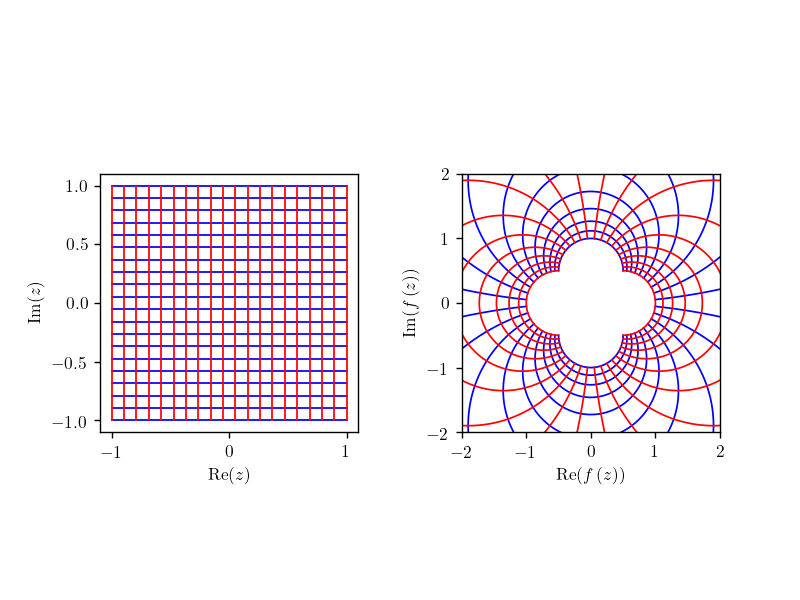

(-2, 2)

In [129]:
inverse = lambda z: 1.0/z if z != 0 else np.nan
_, img = plot_map(grid, inverse)
img.set_xlim(-2, 2)
img.set_ylim(-2, 2)

<IPython.core.display.Javascript object>


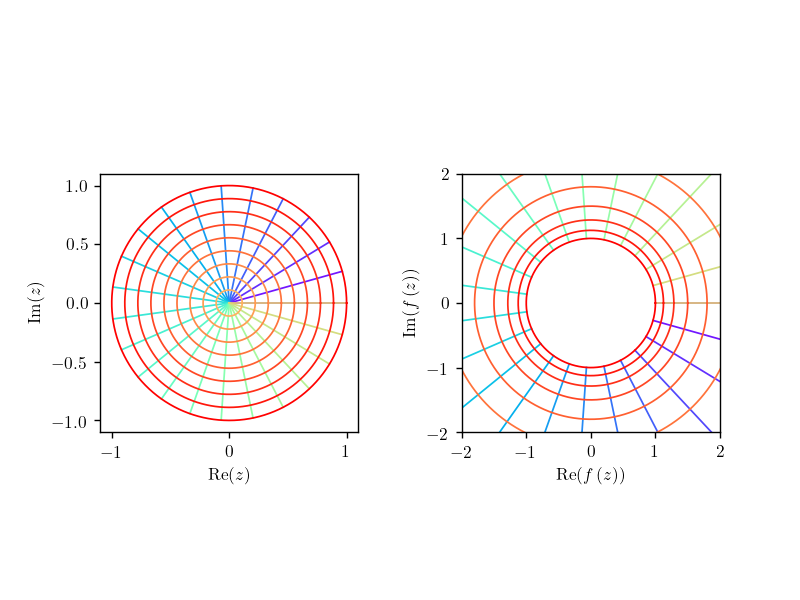

(-2, 2)

In [130]:
_, img = plot_map(polar, inverse, color_each=True)
img.set_xlim(-2, 2)
img.set_ylim(-2, 2)

## Periodic Functions

A function is $P$-periodic if $\forall z\in D_f\subset\mathbb{C},f(z)=f(z+P)$.

- If $P\in\mathbb{R}$ then $f$ is only periodic along the real axis
- If $P$ is purely imaginary (i.e. $\mathrm{Re}(P)=0$) then $f$ is only periodic along the imaginary axis

### The Exponential Function

The exponential function is $2\pi i$-periodic having
$ f(z) = e^z = e^{x+iy} = e^x e^{iy} = e^x (\cos y+i\sin y) $

and $e^{i(y+2\pi)} = \cos(y+2\pi) + i\sin(y+2\pi) = \cos y+i\sin y = e^{iy} $

<IPython.core.display.Javascript object>


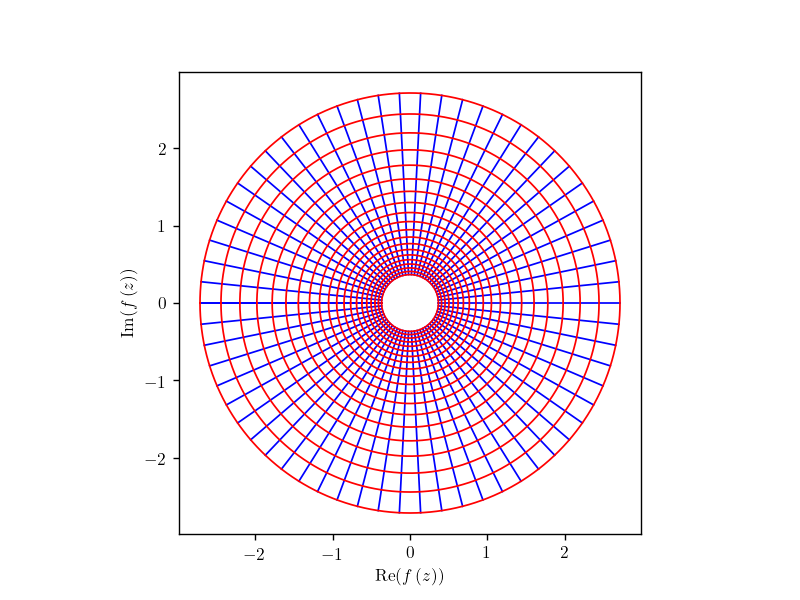

In [131]:
plot_map(init_grid(ylim=(-PI,PI)), np.exp, plot_domain=False, linewidth=1)

### Trigonometric Functions

The expression of the complex cosine function is given as:

\begin{align}
f(z) &= \cos z \\
&= \frac{1}{2} \left( e^{iz} + e^{-iz} \right) \\
&= \frac{1}{2} \left( e^{i(x+iy)} + e^{-i(x+iy)} \right) \\
&= \frac{1}{2} \left( e^{-y+ix} + e^{y-ix} \right) \\
&= \frac{1}{2} \left( e^{-y}(\cos x +i\sin x) + e^{y}(\cos x-i\sin x) \right) \\
&= \cos x \frac{e^y+e^{-y}}{2}- i\sin x \frac{e^y-e^{-y}}{2} \\
&= \cos x \cosh y -i\sin x \sinh y
\end{align}

We can deduce from this formula that:
- $f(x+iy_0)$ plots an ellipse whose semi-major axes are $(\cosh y_0, -\sinh y_0)$
- $f(x_0+iy)$ plots a hyperbola whose semi-major axes are $(\cos x_0, -\sin x_0)$

<IPython.core.display.Javascript object>


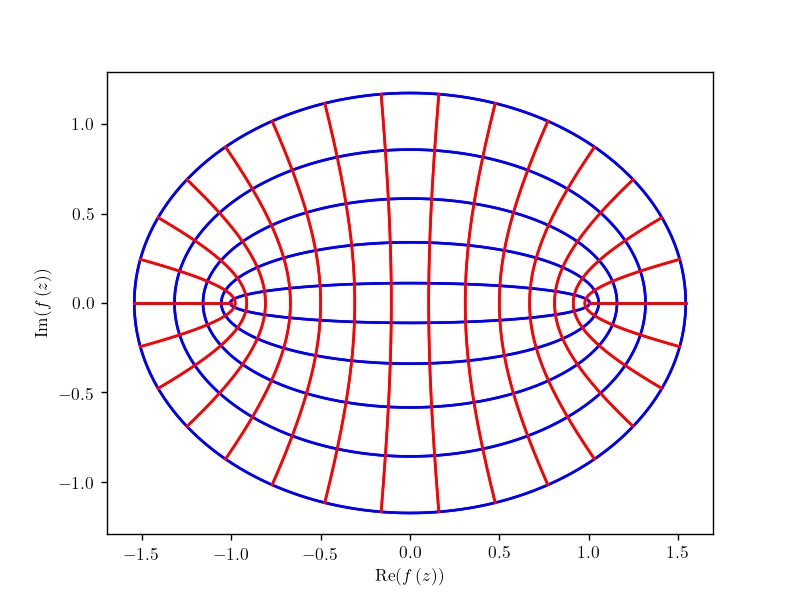

In [132]:
trig_grid = init_grid(xlim=(-PI, PI), step=0.2)
plot_map(trig_grid, np.cos, plot_domain=False, linewidth=1.5)

Similarly for the sine function:
$$ \sin(z)=\sin(x+iy)= \sin x \cosh y +i\cos x \sinh y $$

Therefore
- $f(x+iy_0)$ plots an ellipse whose semi-major axes are $(\cosh y_0, \sinh y_0)$
- $f(x_0+iy)$ plots a hyperbola whose semi-major axes are $(\sin x_0, \cos x_0)$

In [14]:
plot_map(trig_grid, np.sin, plot_domain=False, linewidth=1.5)

<IPython.core.display.Javascript object>

As for the tangent function:

\begin{align}
\tan(z) &= \frac{\sin z}{\cos z} \\
&= i\frac{e^{iz}-e^{-iz}}{e^{iz}+e^{-iz}}\cdot \frac{\cosh z}{\cosh z}\\
&= i\frac{e^{y-ix}-e^{ix-y}}{e^{y-ix}+e^{ix-y}}\frac{e^{y+ix}+e^{-ix-y}}{e^{y+ix}+e^{-ix-y}}\\
&= i\frac{e^{2y}-e^{-2y}+e^{-2ix}-e^{2ix}}{e^{2y}+e^{-2ix}+e^{2ix}+e^{-2y}}\\
&= \frac{\sin(2x)+i\sinh(2y)}{\cosh(2y)+\cos(2x)}
\end{align}

<IPython.core.display.Javascript object>


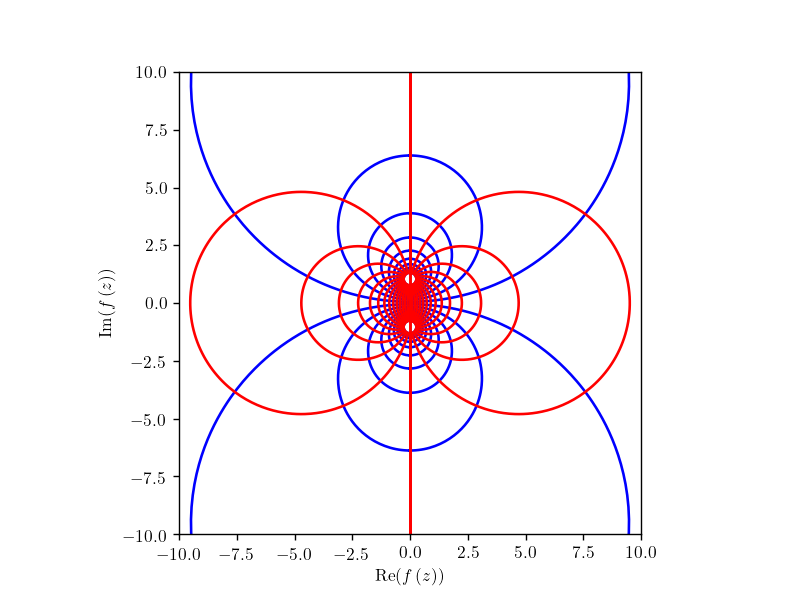

(-10, 10)

In [133]:
img = plot_map(init_grid(xlim=(-PI/2,PI/2)), np.tan, plot_domain=False, linewidth=1.5)
img.set_xlim(-10, 10)
img.set_ylim(-10, 10)

### The Complex Logarithm

The complex logarithm is the inverse of exponential function.
However, since the complex exponential is periodic (hence not injective) the complex logarithm is *not a function*.

For example $\ln(1)=\ln(e^{2\pi ik})=2\pi ik,\forall k\in\mathbb{Z}$.

Nevertheless, the properties of the logarithm still hold, but unlike the real logarithm any non-zero complex number has a logarithm.

$\ln(z)=\ln(r\cdot e^{i\theta})=\ln r + \ln e^{i\theta} = \ln r + i\theta$

<IPython.core.display.Javascript object>


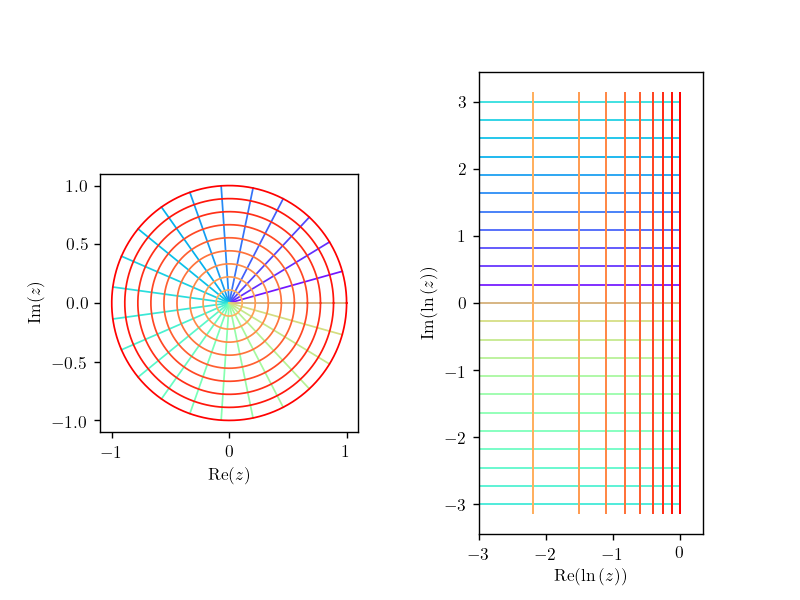

(-3, 0.34533773893242775)

In [134]:
ln = lambda z: np.log(z) if np.abs(z) > 0 else np.nan
_, img = plot_map(polar, ln, color_each=True, func='\\ln')
img.set_xlim(left=-3)

<IPython.core.display.Javascript object>


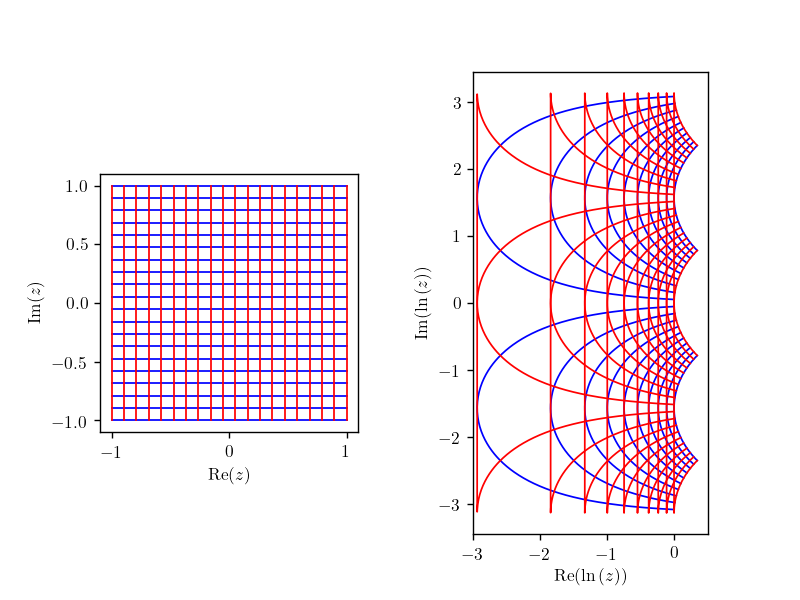

(-3, 0.5111151773103328)

In [135]:
_, img = plot_map(grid, ln, func='\\ln')
img.set_xlim(left=-3)

## Riemann-Zeta Function

$$ \zeta(s) = \sum_{n=1}^{\infty} \frac{1}{n^s} $$

$$ \zeta(s) = 2^s \pi^{s-1} \sin \left(\dfrac{\pi s}2\right) \Gamma(1-s) \zeta(1-s) $$

$$ \zeta(s)=\left(1-2^{1-s}\right)^{-1}\eta(s) $$

$$ \eta(s) = \sum_{n=1}^{\infty} (-1)^{n-1} \frac{1}{n^s} $$

<IPython.core.display.Javascript object>


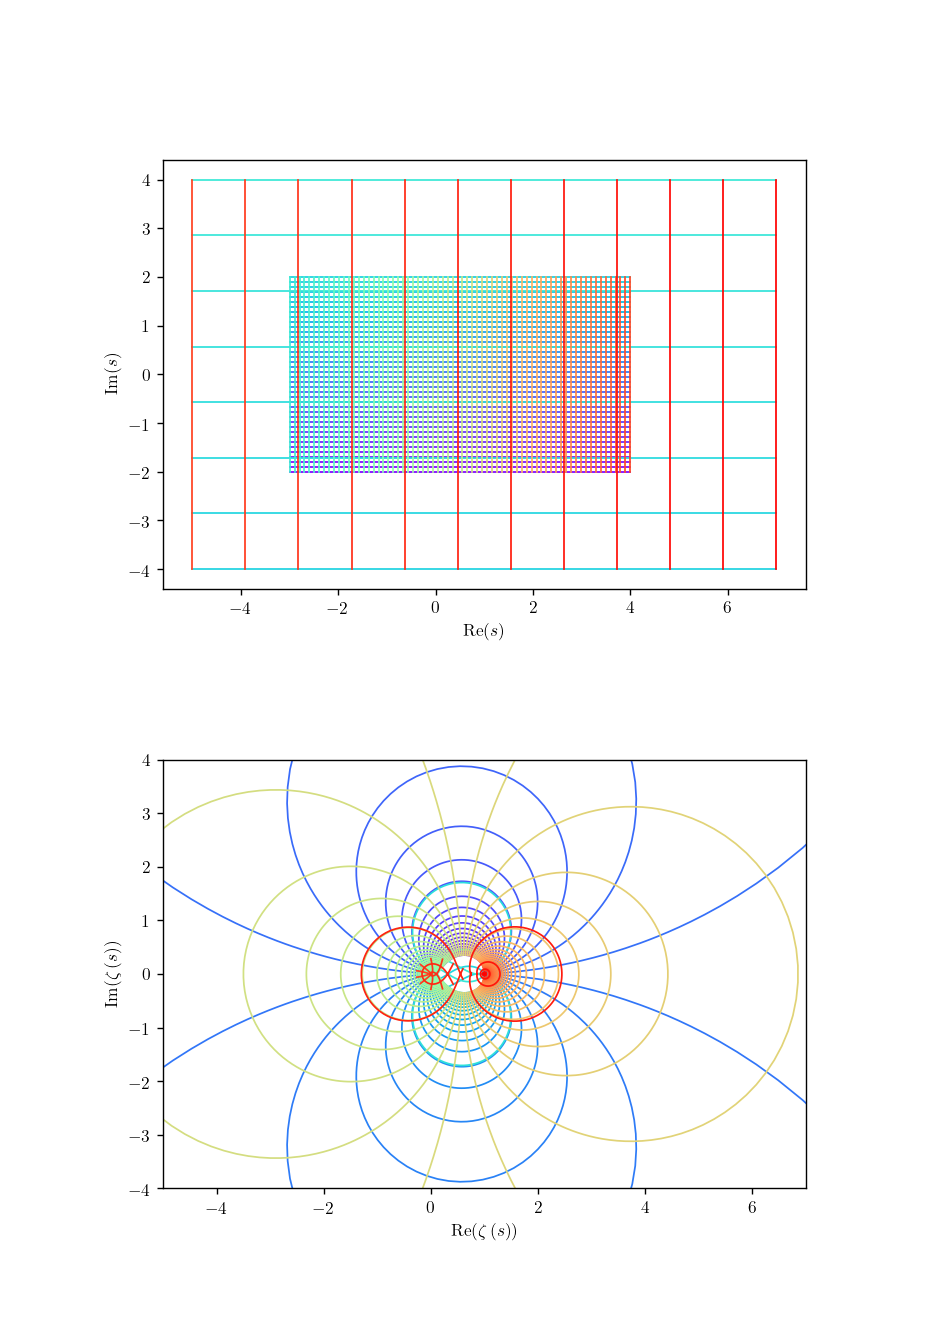

(-4, 4)

In [149]:
small_grid = init_grid(xlim=(-3, 4), ylim=(-2, 2), step=0.1, nb_pts=500)
big_grid = init_grid(xlim=(-5, 7), ylim=(-4, 4), step=1, nb_pts=500)
zeta_grid = (small_grid[0] + big_grid[0], small_grid[1] + big_grid[1])

from mpmath import mp, zeta
mp.pretty = True
mp.dps = 7

_, ax = plot_map(zeta_grid, zeta, align='vertical', var='s', func='\\zeta', color_each=True)
ax.set_xlim(-5,7)
ax.set_ylim(-4,4)

<IPython.core.display.Javascript object>


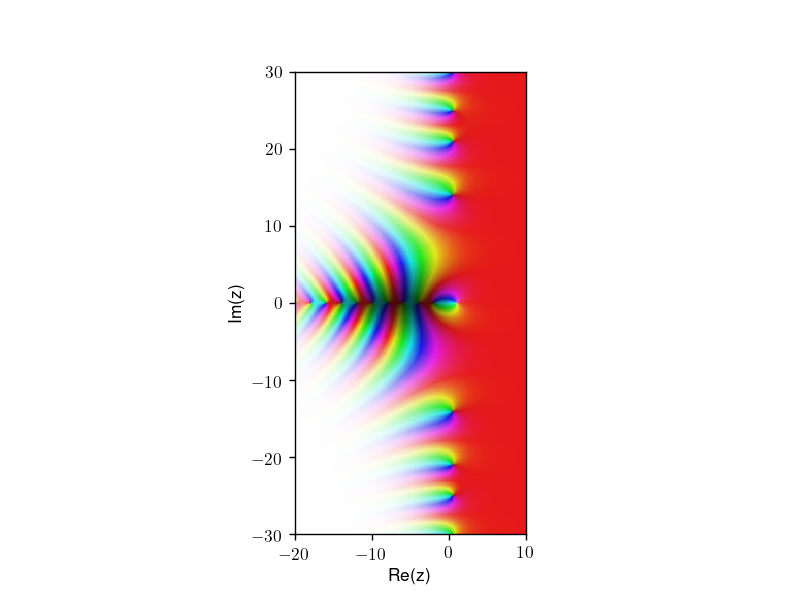

In [139]:
from mpmath import cplot
cplot(zeta, re=[-20, 10], im=[-30, 30], points=100000)

<IPython.core.display.Javascript object>


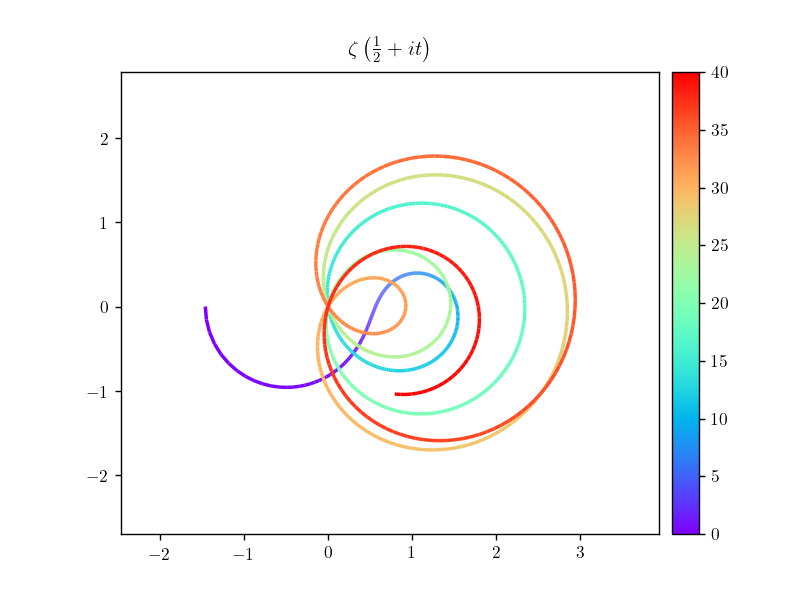

Text(0.5, 1.0, '$\\zeta\\left(\\frac{1}{2} + it\\right)$')

In [141]:
t = np.linspace(0, 40, 1000)
s = 0.5 + (1j * t)
critical = np.array([zeta(z) for z in s], dtype=complex)
ax, _ = plot_gradient_line(critical.real, critical.imag, norm=t, linewidth=2)
ax.set_title(r'$\zeta\left(\frac{1}{2} + it\right)$')